In [40]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
class GridBoard:
    def __init__(self, cols, rows):
        self.rows = rows
        self.cols = cols
        self.rewards = pd.DataFrame(np.zeros((rows, cols)))
        self.walls = []
        for w in self.walls:
        # check here to see if walls within the dataframe boundaries
            if w[0] > -1 and w[0] < grid.cols:
                if w[1] > -1 and w[1] < grid.rows:
                    self.show_board[w[0]][w[1]] = "X"

        self.terminals = []  
        
        self.show_board = pd.DataFrame('.', index=range(self.rows), columns=range(self.cols))

        self.prevq = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

        # q_table of the ground truth when q-values converge
        self.qtruth = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

        # v table of where the ground truth of v values converage
        self.vtruth = pd.DataFrame(np.zeros((self.rows, self.cols)))
        self.prevv = pd.DataFrame(np.zeros((self.rows, self.cols)))

        self.key = []
        self.door = []
    
    def assignRewards(self, row, col, reward):
        self.rewards[row][col] = reward
    
    def assignTerminals(self, row, col):
        self.terminals.append([row, col])
    
    def reset_showboard(self):
        self.show_board = pd.DataFrame('.', index=range(self.rows), columns=range(self.cols))
        for w in self.walls:
            if w[0] > -1 and w[0] < grid.cols:
                if w[1] > -1 and w[1] < grid.rows:
                        self.show_board[w[0]][w[1]] = "X"
    
    def set_walls(self, walls):
        for w in walls:
            self.walls.append(w)
    
    def determineQtruth(self, iters, vBool, take1k):
        for i in range(0, len(iters)):
            run(False, iters[i], None, 1, True, 'ql') 

            if take1k == True:
                if iters[i] == 1000:
                    print(vBool)
                    self.qtruth = player.qtable[:]

                    if vBool == True:
                            print("in there")
                            for i in range(0, len(player.qtable.columns)):
                                for j in range(0, len(player.qtable.index)):                    
                                    v = max(player.qtable[i][j])
                                    self.vtruth[i][j] = v
                    return iters
                
            if i > 0:        
                diffdf = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

                for c in range(0, len(player.qtable.columns)):
                    for r in range(0, len(player.qtable.index)):
                        for l in range(0, 4):   
                            diffdf[c][r][l] = round(player.qtable[c][r][l] - self.prevq[c][r][l],2)

                if self.qtruth.equals(diffdf):
                    print("CONVERGENCE!!!")              
                    self.qtruth = player.qtable[:]

                    if vBool == True:
                        print("in there")
                        for i in range(0, len(player.qtable.columns)):
                            for j in range(0, len(player.qtable.index)):                    
                                v = max(player.qtable[i][j])
                                self.vtruth[i][j] = v

                    return(iters)
                
            
            for c in range(0, len(player.qtable.columns)):
                    for r in range(0, len(player.qtable.index)):
                        for l in range(0, 4):   
                            self.prevq[c][r][l] = player.qtable[c][r][l]
            



In [42]:
class Player:
    def __init__(self, grid, start):
        self.start = start
        self.curr_state = self.start[:]
        grid.show_board[self.curr_state[0]][self.curr_state[1]] = "*"
        self.policy = pd.DataFrame(0, index=range(0,grid.rows), columns=range(0,grid.cols))
        self.v = pd.DataFrame(np.zeros((grid.rows, grid.cols)))
        self.vtable = pd.DataFrame(np.zeros((grid.rows, grid.cols)))

        # q_tables are a list within a dataframe cell with the directions [North, East, South, West], always start at 0
        self.qtable = pd.DataFrame([[[0, 0, 0, 0] for j in range(grid.cols)] for i in range(grid.rows)], index=range(grid.rows), columns=range(grid.cols))

        self.gotkey = False
        self.gotdoor = False


    
    def move(self, direct):
        # determine if a move can occur
        # possible values for act: N, S, E, W
        # need next_state to find walls

        if direct == 'N':
            next_state = [self.curr_state[0], self.curr_state[1]-1]
            if self.curr_state[1] != 0 and next_state not in grid.walls: self.curr_state[1] -= 1 

        elif direct == 'E':
            next_state = [self.curr_state[0]+1, self.curr_state[1]]
            if next_state[0] < grid.cols and next_state not in grid.walls: self.curr_state[0] += 1 

        elif direct == 'S':
            next_state = [self.curr_state[0], self.curr_state[1]+1]
            if next_state[1] < grid.rows and next_state not in grid.walls: self.curr_state[1] += 1 

        elif direct == 'W':
            next_state = [self.curr_state[0]-1, self.curr_state[1]]
            if self.curr_state[0] != 0 and next_state not in grid.walls: self.curr_state[0] -= 1 

        else:
            print("Invalid option")

        grid.reset_showboard()
        grid.show_board[self.curr_state[0]][self.curr_state[1]] = '*'
    
    def detNextState(self, curr_state, direct):

        if direct == 'N': next_state = [self.curr_state[0], self.curr_state[1]-1]
        elif direct == 'E': next_state = [self.curr_state[0]+1, self.curr_state[1]]
        elif direct == 'S': next_state = [self.curr_state[0], self.curr_state[1]+1]
        elif direct == 'W': next_state = [self.curr_state[0]-1, self.curr_state[1]]
        else: print("Invalid option")
        
        return next_state    
    
    def findRandDirection(self):
        d = random.randint(1,4)
        if d == 1: return 'N'
        elif d == 2: return 'E'
        elif d == 3: return 'S'
        elif d == 4: return 'W'
        else:
            print("out of bounds")
        
    def detPolicyV(self):
        # determine policy & V table
        for i in range(0, len(player.policy.columns)):
            for j in range(0, len(player.policy.index)):
                dir = player.qtable[i][j].index(max(player.qtable[i][j]))         
                dirv = getDirChar(dir)
                player.policy[i][j] = dirv
                
                v = max(player.qtable[i][j])
                player.v[i][j] = v
            


In [43]:
class QLearn:
    def __init__(self, gamma, lr, deterministic):
        self.gamma = gamma
        self.deterministic = deterministic
        if not deterministic:
            self.lr = lr
        else:
            self.lr = 1
    
    def findQhat(self, rewards, qtable, cs, ns, d):
        qhat = 0
        if self.deterministic == True:
            if ns not in grid.walls:
                qhat = rewards[ns[0]][ns[1]] + self.gamma * max(qtable[ns[0]][ns[1]][0], qtable[ns[0]][ns[1]][1], qtable[ns[0]][ns[1]][2], qtable[ns[0]][ns[1]][3])
        else:
            if ns not in grid.walls:
                qhat = (1-self.lr) * qtable[cs[0]][cs[1]][d] + \
                    self.lr * (rewards[ns[0]][ns[1]] + self.gamma * \
                    max(qtable[ns[0]][ns[1]][0], qtable[ns[0]][ns[1]][1], qtable[ns[0]][ns[1]][2], qtable[ns[0]][ns[1]][3]))

        return qhat
    
    def findSarsa(self, rewards, qtable, cs, ns, d):
        # difference with Sarsa is it follows a policy premade
        qhat = 0
        if ns not in grid.walls:
            nextDir = getDirInt(player.policy[ns[0]][ns[1]])
            qhat = (1-self.lr) * qtable[cs[0]][cs[1]][d] + self.lr * (rewards[ns[0]][ns[1]] + self.gamma * qtable[ns[0]][ns[1]][nextDir])
            
        return qhat

    def findV(self, rewards, qtable, cs, ns, d):
        # used for TD
        v = 0
        if ns not in grid.walls:
            nextDir = getDirInt(player.policy[ns[0]][ns[1]])
            v = player.vtable[cs[0]][cs[1]] + self.lr * (rewards[ns[0]][ns[1]] + self.gamma * (player.vtable[ns[0]][ns[1]] - player.vtable[cs[0]][cs[1]]))
            
        return v

In [44]:
class Charts():
    def __init__(self, episodes):
        self.stepsGoal = pd.DataFrame(0, columns=['Steps'], index=range(1, episodes+1))
        self.stepsGoal.index.name = 'Episodes'
        self.sse = pd.DataFrame(0, columns=['SSE'], index=range(1, episodes+1))

        self.stepsKey = pd.DataFrame(0, columns=['Key', 'Door', 'Goal'], index=range(1, episodes+1))

    
    def determineSSE(self, type):
        if type == 'q':
            truth = grid.qtruth
            pred = player.qtable
        else:
            truth = grid.vtruth
            pred = player.vtable

        truthList = []
        currentPred = []
        sseVal = 0

        # convert the DF of lists into a big list per DF
        for c in range(0, len(truth.columns)):
            for r in range(0, len(truth.index)):
                truthList.append(truth[c][r])

        for c in range(0, len(pred.columns)):
            for r in range(0, len(pred.index)):
                currentPred.append(pred[c][r])
            
        if type == 'q':
            truthList = [j for i in truthList for j in i]
            currentPred = [j for i in currentPred for j in i]


        for t in range(0, len(truthList)):
            sseVal += (truthList[t] - currentPred[t])**2
        
        return sseVal

In [45]:
# function to create gridboard, set up walls & boundaries and assign rewards
# recieves: columns, rows, arewards array for rewards
def setupGrid(columns, rows, arewards, aterminals, key, door):
    grid = GridBoard(columns, rows)
    grid.key = key
    grid.door = door
    
    # create walls and boundaries, treat out of bounds as walls
    for c in range(0, grid.cols):
        grid.walls.append([c, -1])
        grid.walls.append([c, grid.rows])
    for r in range(0, grid.rows):
        grid.walls.append([-1, r])
        grid.walls.append([grid.cols, r])

    for reward in arewards:
        grid.assignRewards(reward[0], reward[1], reward[2])
    
    for terminal in aterminals:
        grid.assignTerminals(terminal[0], terminal[1])

    return grid

In [46]:
def getDirInt(direct):
    d = 0
    if direct == 'N': d = 0
    elif direct == 'E': d = 1
    elif direct == 'S': d = 2
    elif direct == 'W': d = 3
    return d

def getDirChar(direct):
    d = ''
    if direct == 0: d = 'N'
    elif direct == 1: d = 'E'
    elif direct == 2: d = 'S'
    elif direct == 3: d = 'W'
    return d

In [47]:
# receives: pdef (if predefined path or not), iterations, path (none if not predefined)
def run(pdef, iters, path, eps, getQtruth, alg):
   
    if pdef == False:
        for i in range(0, iters):
            stepCount = 0
            stepsToKey = 0
            stepsToDoor = 0
            stepsToGoal = 0
            while player.curr_state not in grid.terminals:
                x = player.curr_state[0]
                y = player.curr_state[1]

                p = np.random.random()
                if p < (1-eps):
                    if player.policy[x][y] != 0:
                        direct = player.policy[x][y]
                    else: 
                        direct = player.findRandDirection()
                else: # random
                    direct = player.findRandDirection()

                next_state = player.detNextState(player.curr_state, direct)

                d = getDirInt(direct)

                if alg == 'ql':
                    qhat = qlearn.findQhat(grid.rewards, player.qtable, player.curr_state, next_state, d)
                    qhat = round(qhat, 2)
                    player.qtable[x][y][d] = qhat
                elif alg == 'sarsa':
                    qhat = qlearn.findSarsa(grid.rewards, player.qtable, player.curr_state, next_state, d)
                    qhat = round(qhat, 2)
                    player.qtable[x][y][d] = qhat
                elif alg == 'td':
                    vhat = qlearn.findV(grid.rewards, player.qtable, player.curr_state, next_state, d)
                    vhat = round(vhat, 2)
                    player.vtable[x][y] = vhat                 

                player.move(direct)
                stepCount += 1    

                    
                if player.curr_state == grid.key:
                    player.gotkey = True
                    if grid.door in grid.walls:
                        grid.walls.remove(grid.door)  
                
                if player.curr_state == grid.door:
                    player.gotdoor = True

                if getQtruth == False:
                    # update the steps goal df
                    charts.stepsGoal['Steps'][i+1] = stepCount
                    if player.gotkey == False:                      
                        stepsToKey += 1

                    if player.gotdoor == False:                      
                        stepsToDoor += 1



            if getQtruth == False:
                # determine the new policy and V table
                if alg == 'ql':
                    player.detPolicyV()

                # get SSE
                if alg == 'td':
                    charts.sse['SSE'][i+1] = charts.determineSSE('v')
                else:
                    charts.sse['SSE'][i+1] = charts.determineSSE('q')

                charts.stepsKey['Key'][i+1] = stepsToKey
                trueStepsToDoor = stepsToDoor - stepsToKey
                charts.stepsKey['Door'][i+1] = trueStepsToDoor
                charts.stepsKey['Goal'][i+1] = stepCount - (trueStepsToDoor + stepsToKey) 


            # move player back to start position
            player.curr_state = player.start[:]
            # reset door
            if grid.door is not None:
                grid.walls.append(grid.door)
                player.gotkey = False
                player.gotdoor = False

            if i % 10 == 0:
                print(i, end=' ')

        player.qtable = player.qtable.round(2)
        player.vtable = player.vtable.round(2)               

    
    else:   
        for t in path:            
            for direct in t:
                x = player.curr_state[0]
                y = player.curr_state[1]

                next_state = player.detNextState(player.curr_state, direct)

                d = getDirInt(direct)

                qhat = qlearn.findQhat(grid.rewards, player.qtable, player.curr_state, next_state, d)

                qhat = round(qhat, 2)

                player.qtable[x][y][d] = qhat

                player.move(direct)

            player.curr_state = player.start[:]

        player.qtable = player.qtable.round(2)

In [48]:
# Non-deterministic Homework example
aRewards = [[0, 2, 25], [1, 2, -100], [1, 0, -80], [2, 2, 80], [2, 0, 100]]
aTerminals = [[0, 2], [1, 2], [1, 0], [2, 2], [2, 0]]

grid = setupGrid(3, 3, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.5, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

grid.reset_showboard()

player = Player(grid, [0, 0])

iters = 10

print(player.curr_state)
print(grid.show_board)

path = [['S', 'E', 'S'], ['S', 'E', 'E', 'N'], ['S', 'E', 'E', 'S']]

run(True, iters, path, 0.1, False, 'ql')
print(grid.show_board)



0 10 20 30 40 0 10 20 30 40 50 0 10 20 30 40 50 60 0 10 20 30 40 50 60 70 [0, 0]
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  .  .  .
2  .  .  *


0 10 20 30 40 0 10 20 30 40 50 CONVERGENCE!!!
   0  1  2
0  .  .  .
1  *  .  .
0 10 20 30 40 50 60 70 80 90                     0                       1                 2
0  [0, 90.0, 72.9, 0]  [0, 100.0, 81.0, 81.0]      [0, 0, 0, 0]
1  [81.0, 81.0, 0, 0]      [90.0, 90.0, 0, 0]  [100.0, 0, 0, 0]
   0  1  2
0  .  .  *
1  .  .  .


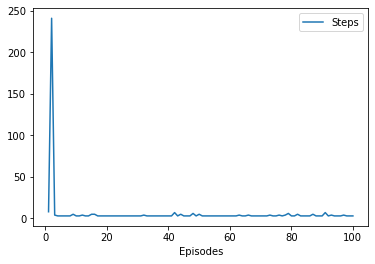

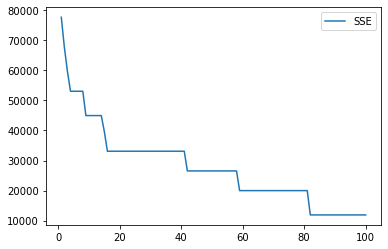

In [49]:
# Deterministic In class example
aRewards = [[2, 0, 100]]
aTerminals = [[2, 0]]

grid = setupGrid(3, 2, aRewards, aTerminals, None, None)
player = Player(grid, [0, 1])
qlearn = QLearn(0.9, None, True)

itersTruth = [50, 60, 70]
grid.determineQtruth(itersTruth, False, False)

iters = 100

grid.reset_showboard()
player = Player(grid, [0, 1])
charts = Charts(iters)

print(grid.show_board)

run(False, iters, None, 0.1, False, 'ql')
print(player.qtable)
print(grid.show_board)

player.detPolicyV()


plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
plt.figure()
g2 = sns.lineplot(data=charts.sse)

0 10 20 30 40 0 10 20 30 40 50 0 10 20 30 40 50 60 CONVERGENCE!!!
qtruth
                          0                             1  \
0      [0, 47.81, 47.81, 0]      [0, 53.13, 53.13, 43.02]   
1  [43.02, 53.13, 53.13, 0]  [47.81, 59.04, 59.04, 47.81]   
2  [47.81, 59.04, 59.04, 0]    [53.13, 65.6, 65.6, 53.13]   
3    [53.13, 65.6, 65.6, 0]    [59.04, 72.9, 72.9, 59.04]   
4       [59.04, 72.9, 0, 0]         [65.6, 81.0, 0, 65.6]   

                            2                           3  \
0    [0, 59.04, 59.04, 47.81]      [0, 65.6, 65.6, 53.13]   
1  [53.13, 65.6, 65.6, 53.13]  [59.04, 72.9, 72.9, 59.04]   
2  [59.04, 72.9, 72.9, 59.04]    [65.6, 81.0, 81.0, 65.6]   
3    [65.6, 81.0, 81.0, 65.6]    [72.9, 90.0, 90.0, 72.9]   
4       [72.9, 90.0, 0, 72.9]      [81.0, 100.0, 0, 81.0]   

                        4  
0     [0, 0, 72.9, 59.04]  
1   [65.6, 0, 81.0, 65.6]  
2   [72.9, 0, 90.0, 72.9]  
3  [81.0, 0, 100.0, 81.0]  
4            [0, 0, 0, 0]  
   0  1  2  3  4
0  *  . 

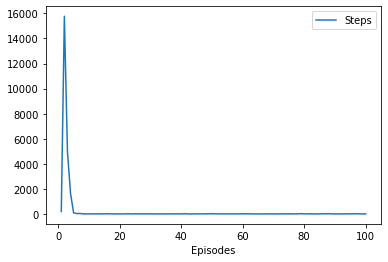

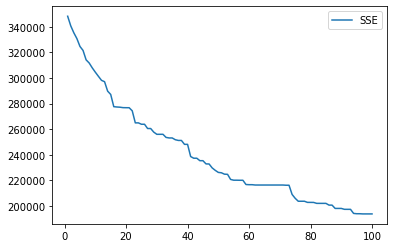

In [50]:
# finding the ground truth by determining at what level of iteration the diffences in the 
# qtables becoes small enough to conclude ground truth: using that as basis for 
# sum of squared errors calculation.

# QLearning Non-deterministic example
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)

runiters = [100]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])

    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    player.detPolicyV()

    print(player.policy)

qlsteps = charts.stepsGoal[:]
qlsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=qlsteps)
plt.figure()
g2 = sns.lineplot(data=qlsse)

    

    


0 10 20 30 40 0 10 20 30 40 50 CONVERGENCE!!!
qtruth
                          0                             1  \
0      [0, 47.81, 47.81, 0]      [0, 53.13, 53.13, 43.02]   
1  [43.02, 53.13, 53.13, 0]  [47.81, 59.04, 59.04, 47.81]   
2  [47.81, 59.04, 59.04, 0]    [53.13, 65.6, 65.6, 53.13]   
3    [53.13, 65.6, 65.6, 0]    [59.04, 72.9, 72.9, 59.04]   
4       [59.04, 72.9, 0, 0]         [65.6, 81.0, 0, 65.6]   

                            2                           3  \
0    [0, 59.04, 59.04, 47.81]      [0, 65.6, 65.6, 53.13]   
1  [53.13, 65.6, 65.6, 53.13]  [59.04, 72.9, 72.9, 59.04]   
2  [59.04, 72.9, 72.9, 59.04]    [65.6, 81.0, 81.0, 65.6]   
3    [65.6, 81.0, 81.0, 65.6]    [72.9, 90.0, 90.0, 72.9]   
4       [72.9, 90.0, 0, 72.9]      [81.0, 100.0, 0, 81.0]   

                        4  
0     [0, 0, 72.9, 59.04]  
1   [65.6, 0, 81.0, 65.6]  
2   [72.9, 0, 90.0, 72.9]  
3  [81.0, 0, 100.0, 81.0]  
4            [0, 0, 0, 0]  
Policy
   0  1  2  3  4
0  S  E  E  E  S
1  E

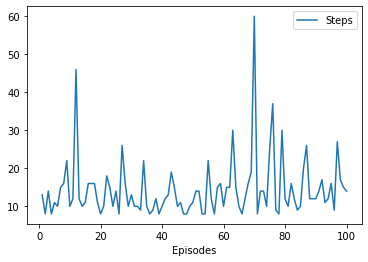

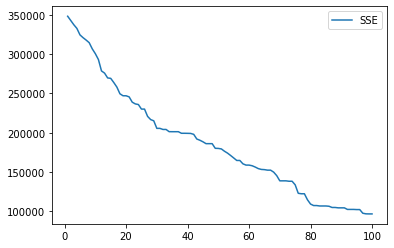

In [51]:
# SARSA
# predefined policy, not optimal
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)



runiters = [100]
for i in range(0, len(runiters)):

    p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    policy = pd.DataFrame(p)

    grid.reset_showboard()
    player = Player(grid, [0, 0])
    player.policy = policy

    print("Policy")
    print(player.policy)

    charts = Charts(runiters[i])

    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)

sarsteps = charts.stepsGoal[:]
sarsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=sarsteps)
plt.figure()
g2 = sns.lineplot(data=sarsse)


    

    


0 10 20 30 40 50 60 70 80 90 0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 CONVERGENCE!!!
in there
vtruth
       0      1      2      3      4
0  47.81  53.13  59.04   65.6   72.9
1  53.13  59.04  65.60   72.9   81.0
2  59.04  65.60  72.90   81.0   90.0
3  65.60  72.90  81.00   90.0  100.0
4  72.90  81.00  90.00  100.0    0.0
   0  1  2  3  4
0  *  .  .  .  .
1  .  .  .  .  .
2  .  .  .  .  .
3  .  .  .  .  .
4  .  .  .  .  .
0 10 20 30 40 50 60 70 80 90    0  1  2  3  4
0  .  .  .  .  .
1  .  .  .  .  .
2  .  .  .  .  .
3  .  .  .  .  .
4  .  .  .  .  *


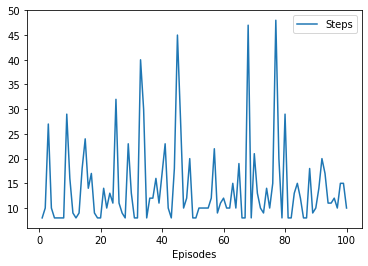

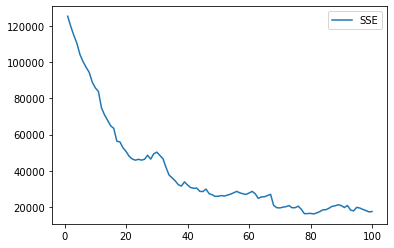

In [52]:
# TD prediction
# Use the V table instead of the Q table, V table is updated on each iteration based on reward location

aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

# Create V table
player.v[4][4] = 100

itersTruth = [100, 200, 500, 900]

grid.determineQtruth(itersTruth, True, False)

print("vtruth")
print(grid.vtruth)


runiters = [100]
for i in range(0, len(runiters)):

    p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    policy = pd.DataFrame(p)

    grid.reset_showboard()
    player = Player(grid, [0, 0])
    print(grid.show_board)

    player.policy = policy
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'td')

    print(grid.show_board)

tdsteps = charts.stepsGoal[:]
tdsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
plt.figure()
g2 = sns.lineplot(data=charts.sse)



0 10 20 30 40 0 10 20 30 40 50 CONVERGENCE!!!
qtruth
                          0                         1                     2  \
0      [0, 47.81, 38.71, 0]  [0, 53.13, 43.02, 43.02]  [0, 59.04, 0, 47.81]   
1  [43.02, 43.02, 34.83, 0]  [47.81, 0, 38.71, 38.71]          [0, 0, 0, 0]   
2  [38.71, 38.71, 31.34, 0]  [43.02, 0, 34.83, 34.83]          [0, 0, 0, 0]   
3   [34.83, 34.83, 28.2, 0]  [38.71, 0, 31.34, 31.34]          [0, 0, 0, 0]   
4      [31.34, 31.34, 0, 0]       [34.83, 0, 0, 28.2]          [0, 0, 0, 0]   

                        3                       4  
0  [0, 65.6, 65.6, 53.13]     [0, 0, 72.9, 59.04]  
1  [59.04, 72.9, 72.9, 0]   [65.6, 0, 81.0, 65.6]  
2   [65.6, 81.0, 81.0, 0]   [72.9, 0, 90.0, 72.9]  
3   [72.9, 90.0, 90.0, 0]  [81.0, 0, 100.0, 81.0]  
4     [81.0, 100.0, 0, 0]            [0, 0, 0, 0]  
   0  1  2  3  4
0  *  .  .  .  .
1  .  .  X  .  .
2  .  .  X  .  .
3  .  .  X  .  .
4  .  .  X  .  .
0 10 20 30 40 50 60 70 80 90    0  1  2  3  4
0  .  .  .  

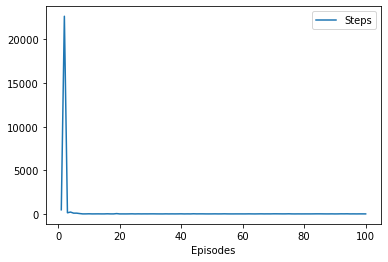

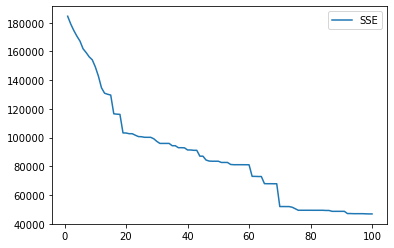

In [53]:
# QLearning Non-deterministic example with walls and one opening
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
grid.set_walls([[2, 1], [2, 2], [2, 3], [2, 4]])
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)

runiters = [100]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])
    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    player.detPolicyV()

    print(player.policy)

qlwsteps = charts.stepsGoal[:]
qlwsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=qlwsteps)
plt.figure()
g2 = sns.lineplot(data=qlwsse)

    

    


0 10 20 30 40 0 10 20 30 40 50 CONVERGENCE!!!
qtruth
                          0                            1                    2  \
0      [0, 47.81, 47.81, 0]         [0, 0, 53.13, 43.02]         [0, 0, 0, 0]   
1  [43.02, 53.13, 53.13, 0]     [47.81, 0, 59.04, 47.81]         [0, 0, 0, 0]   
2  [47.81, 59.04, 47.81, 0]  [53.13, 65.6, 53.13, 53.13]  [0, 72.9, 0, 59.04]   
3  [53.13, 53.13, 43.02, 0]     [59.04, 0, 47.81, 47.81]         [0, 0, 0, 0]   
4      [47.81, 47.81, 0, 0]         [53.13, 0, 0, 43.02]         [0, 0, 0, 0]   

                          3                       4  
0        [0, 65.6, 65.6, 0]     [0, 0, 72.9, 59.04]  
1    [59.04, 72.9, 72.9, 0]   [65.6, 0, 81.0, 65.6]  
2  [65.6, 81.0, 81.0, 65.6]   [72.9, 0, 90.0, 72.9]  
3     [72.9, 90.0, 90.0, 0]  [81.0, 0, 100.0, 81.0]  
4       [81.0, 100.0, 0, 0]            [0, 0, 0, 0]  
0 10 20 30 40 50 60 70 80 90    0  1  2  3  4
0  .  .  X  .  .
1  .  .  X  .  .
2  .  .  .  .  .
3  .  .  X  .  .
4  .  .  X  .  *


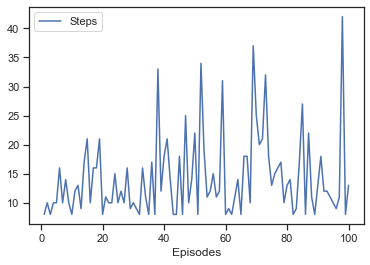

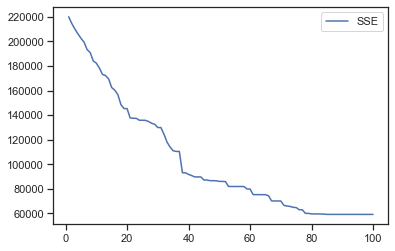

In [74]:
# SARSA with wall with one opening
# predefined policy, not optimal
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
grid.set_walls([[2, 0], [2, 1], [2, 3], [2, 4]])
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)



runiters = [100]
for i in range(0, len(runiters)):

    p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    policy = pd.DataFrame(p)

    grid.reset_showboard()
    player = Player(grid, [0, 0])

    player.policy = policy
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)

sarwsteps = charts.stepsGoal[:]
sarwsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=sarwsteps)
plt.figure()
g2 = sns.lineplot(data=sarwsse)


    

    


0 10 20 30 40 50 60 70 80 90 0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 CONVERGENCE!!!
in there
0 10 20 30 40 50 60 70 80 90    0  1  2  3  4
0  .  .  X  .  .
1  .  .  X  .  .
2  .  .  .  .  .
3  .  .  X  .  .
4  .  .  X  .  *


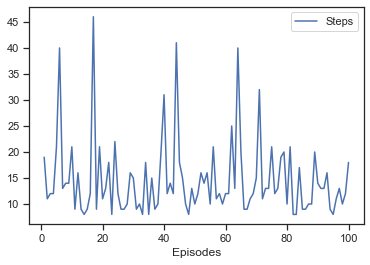

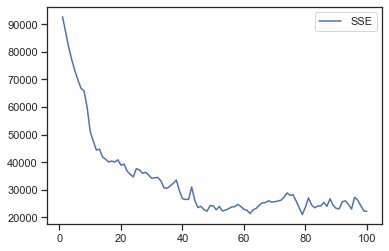

In [75]:
# TD prediction with walls and one opening
# Use the V table instead of the Q table, V table is updated on each iteration based on reward location

aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
grid.set_walls([[2, 0], [2, 1], [2, 3], [2, 4]])
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

# Create V table
player.v[4][4] = 100

itersTruth = [100, 200, 500, 1000]

grid.determineQtruth(itersTruth, True, False)

runiters = [100]
for i in range(0, len(runiters)):

    p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    policy = pd.DataFrame(p)
    #print(policy)

    grid.reset_showboard()
    player = Player(grid, [0, 0])

    player.policy = policy
    #print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'td')

    print(grid.show_board)

tdwsteps = charts.stepsGoal[:]
tdwsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=tdwsteps)
plt.figure()
g2 = sns.lineplot(data=tdwsse)



[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 False
qtruth
                          0                             1  \
0       [0, 34.98, 42.0, 0]          [0, 0, 39.18, 35.67]   
1  [36.64, 48.63, 41.83, 0]      [33.79, 0, 56.47, 41.89]   
2  [35.71, 53.83, 33.08, 0]  [48.24, 64.59, 35.06, 39.22]   
3  [37.47, 30.36, 29.66, 0]      [50.59, 0, 29.08, 31.96]   
4      [32.97, 28.09, 0, 0]          [30.21, 0, 0, 29.09]   

                    

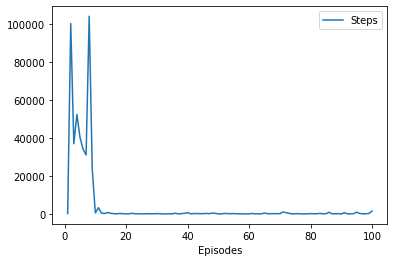

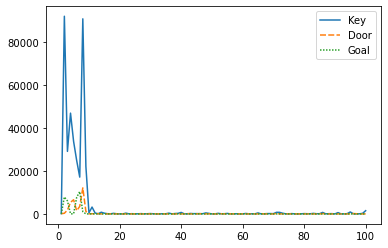

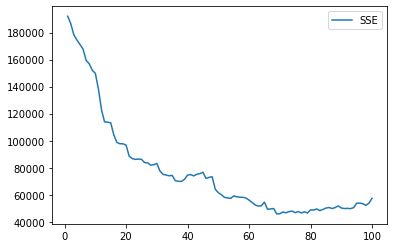

In [56]:
# QLearning Non-deterministic example with walls and with key and door
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, [0, 4], [2, 2])
grid.set_walls([[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [1000]
grid.determineQtruth(itersTruth, False, True)

print("qtruth")
print(grid.qtruth)

runiters = [100]
for i in range(0, len(runiters)):

    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])
    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    player.detPolicyV()

    print(player.policy)

    print(charts.stepsKey)

qlkeysteps = charts.stepsGoal[:]
qlkeysse = charts.sse[:]
qlkey = charts.stepsKey[:]

plt.figure()
g1 = sns.lineplot(data=qlkeysteps)
plt.figure()
g2 = sns.lineplot(data=qlkey)
plt.figure()
g3 = sns.lineplot(data=qlkeysse)

    

    


[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 False
qtruth
                          0                             1  \
0       [0, 47.3, 47.39, 0]          [0, 0, 52.61, 42.64]   
1  [42.63, 52.64, 52.78, 0]      [47.25, 0, 58.52, 47.39]   
2  [47.41, 58.68, 47.31, 0]  [52.43, 65.58, 52.51, 52.23]   
3  [52.74, 52.66, 38.81, 0]      [58.85, 0, 46.64, 46.94]   
4       [46.68, 43.6, 0, 0]           [52.5, 0, 0, 38.74]   

                    

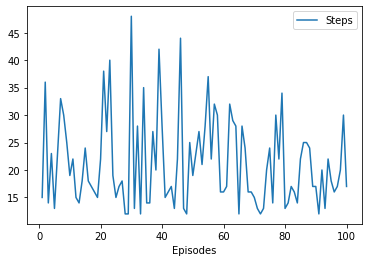

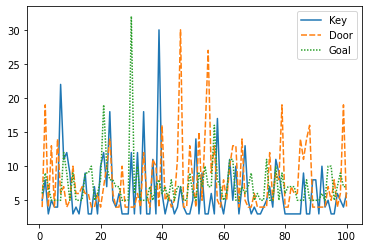

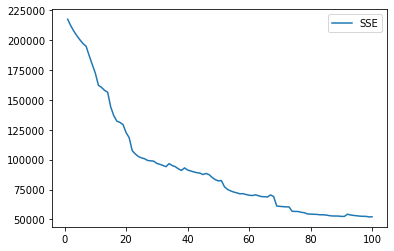

In [57]:
# SARSA with wall with door, key
# predefined policy, not optimal
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, [0, 4], [2, 2])
grid.set_walls([[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [1000]
grid.determineQtruth(itersTruth, False, True)

print("qtruth")
print(grid.qtruth)



runiters = [100]
for i in range(0, len(runiters)):
    p = [['S', 'W', 'X', 'S', 'S'], ['S', 'W', 'X', 'S', 'S'], ['S', 'E', 'E', 'E', 'S'], ['S', 'N', 'X', 'E', 'S'], ['E', 'N', 'X', 'E', 'N']]
    policy = pd.DataFrame(p)
    print(policy)

    player = Player(grid, [0, 0])
    player.policy = policy
    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)

    print(player.policy)

sarkeysteps = charts.stepsGoal[:]
sarkeysse = charts.sse[:]
sarkey = charts.stepsKey[:]

plt.figure()
g1 = sns.lineplot(data=sarkeysteps)
plt.figure()
g2 = sns.lineplot(data=sarkey)
plt.figure()
g3 = sns.lineplot(data=sarkeysse)


    

    

    

    


[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 True
in there
vtruth
       0      1     2      3      4
0  41.14  45.91   0.0   65.6   72.9
1  46.44  53.49   0.0   72.9   81.0
2  55.76  64.59  72.9   81.0   90.0
3  45.14  55.28   0.0   90.0  100.0
4  39.78  43.22   0.0  100.0    0.0
   0  1  2  3  4
0  S  W  X  S  S
1  S  W  X  S  S
2  S  E  E  E  S
3  S  N  X  E  S
4  E  N  X  E  N
   0  1  2  3  4
0  S  W  X  S  S
1  S  W  X  S  S
2  S  E  E

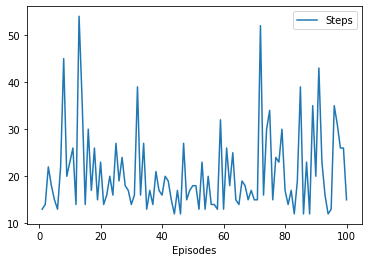

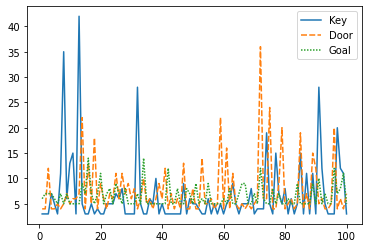

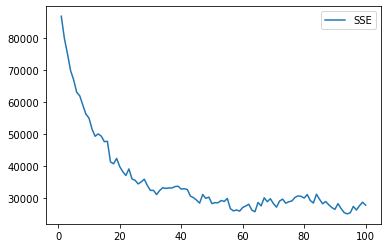

In [58]:
# TD prediction with walls, key, door
# Use the V table instead of the Q table, V table is updated on each iteration based on reward location

aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, [0, 4], [2, 2])
grid.set_walls([[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
qlearn = QLearn(0.9, 0.5, False)

# Create V table
player.v[4][4] = 100

itersTruth = [1000]

grid.determineQtruth(itersTruth, True, True)

print("vtruth")
print(grid.vtruth)


runiters = [100]
for i in range(0, len(runiters)):
    p = [['S', 'W', 'X', 'S', 'S'], ['S', 'W', 'X', 'S', 'S'], ['S', 'E', 'E', 'E', 'S'], ['S', 'N', 'X', 'E', 'S'], ['E', 'N', 'X', 'E', 'N']]
    policy = pd.DataFrame(p)
    print(policy)

    player = Player(grid, [0, 0])
    player.policy = policy
    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'td')

    print(grid.show_board)

tdkeysteps = charts.stepsGoal[:]
tdkeysse = charts.sse[:]
tdkey = charts.stepsKey

plt.figure()
g1 = sns.lineplot(data=tdkeysteps)
plt.figure()
g2 = sns.lineplot(data=tdkey)
plt.figure()
g3 = sns.lineplot(data=tdkeysse)



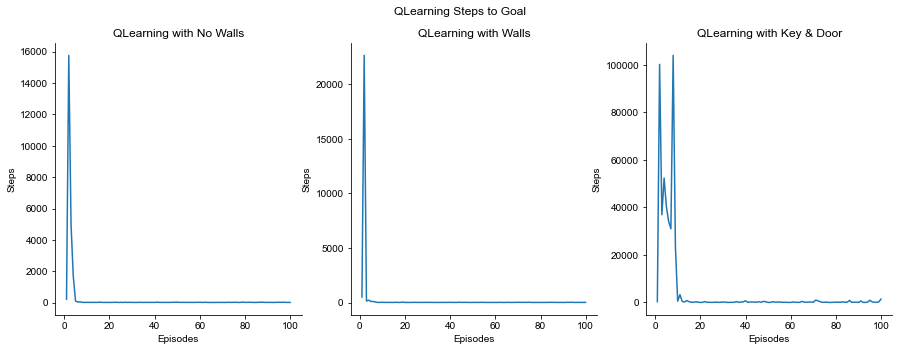

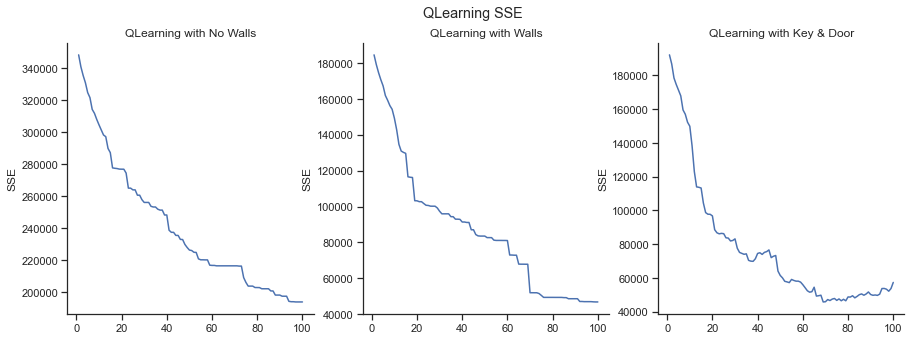

In [59]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('QLearning Steps to Goal')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("QLearning with No Walls")
ax2.set_title("QLearning with Walls")
ax3.set_title("QLearning with Key & Door")

sns.lineplot(x=qlsteps.index, y='Steps', data=qlsteps, ax=ax1)
sns.lineplot(x=qlsteps.index, y='Steps', data=qlwsteps, ax=ax2)
sns.lineplot(x=qlsteps.index, y='Steps', data=qlkeysteps, ax=ax3)

plt.show()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('QLearning SSE')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("QLearning with No Walls")
ax2.set_title("QLearning with Walls")
ax3.set_title("QLearning with Key & Door")

sns.lineplot(x=qlsse.index, y='SSE', data=qlsse, ax=ax1)
sns.lineplot(x=qlwsse.index, y='SSE', data=qlwsse, ax=ax2)
sns.lineplot(x=qlkeysse.index, y='SSE', data=qlkeysse, ax=ax3)

plt.show()

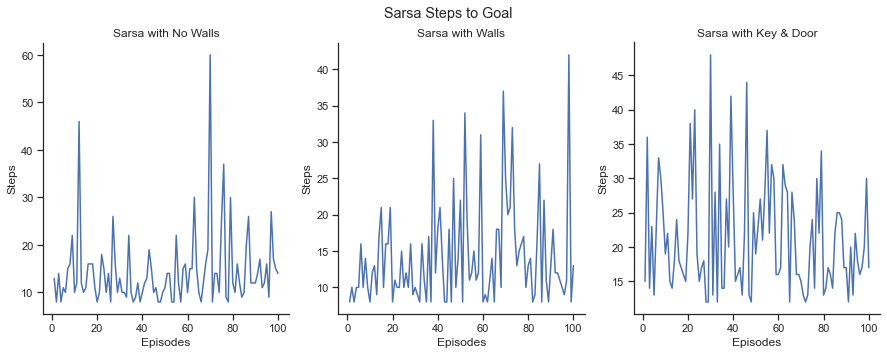

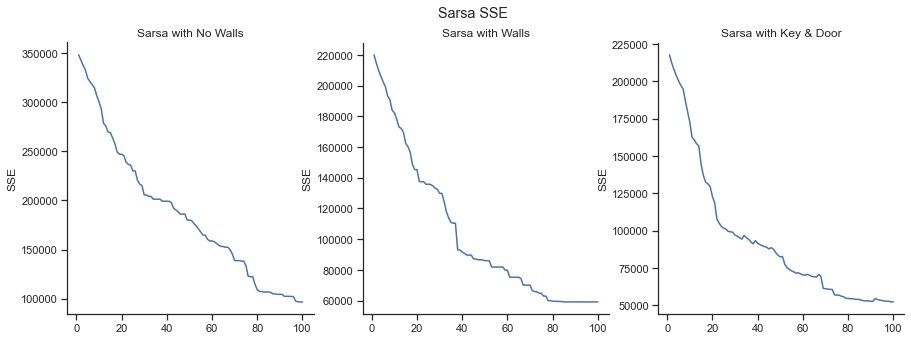

In [76]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('Sarsa Steps to Goal')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("Sarsa with No Walls")
ax2.set_title("Sarsa with Walls")
ax3.set_title("Sarsa with Key & Door")

sns.lineplot(x=sarsteps.index, y='Steps', data=sarsteps, ax=ax1)
sns.lineplot(x=sarwsteps.index, y='Steps', data=sarwsteps, ax=ax2)
sns.lineplot(x=sarkeysteps.index, y='Steps', data=sarkeysteps, ax=ax3)

plt.show()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('Sarsa SSE')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("Sarsa with No Walls")
ax2.set_title("Sarsa with Walls")
ax3.set_title("Sarsa with Key & Door")

sns.lineplot(x=sarsse.index, y='SSE', data=sarsse, ax=ax1)
sns.lineplot(x=sarwsse.index, y='SSE', data=sarwsse, ax=ax2)
sns.lineplot(x=sarkeysse.index, y='SSE', data=sarkeysse, ax=ax3)

plt.show()

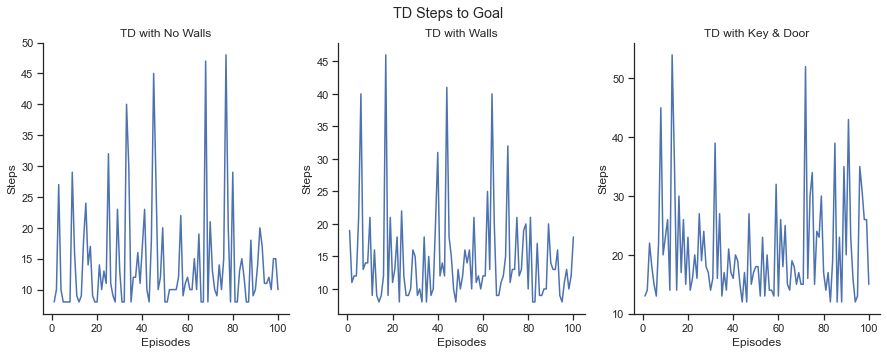

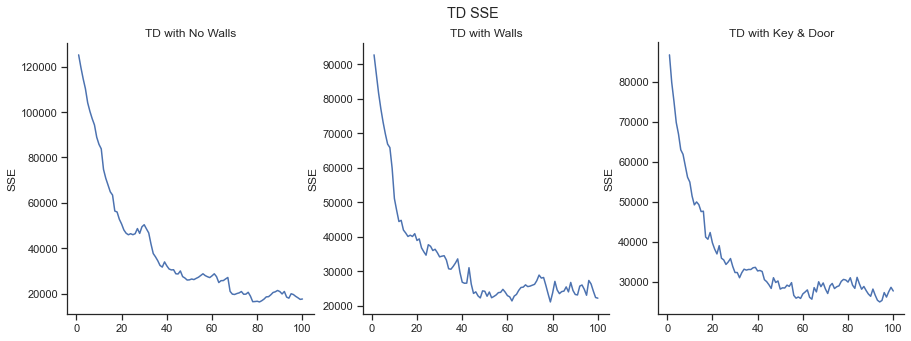

In [77]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('TD Steps to Goal')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("TD with No Walls")
ax2.set_title("TD with Walls")
ax3.set_title("TD with Key & Door")

sns.lineplot(x=tdsteps.index, y='Steps', data=tdsteps, ax=ax1)
sns.lineplot(x=tdwsteps.index, y='Steps', data=tdwsteps, ax=ax2)
sns.lineplot(x=tdkeysteps.index, y='Steps', data=tdkeysteps, ax=ax3)

plt.show()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('TD SSE')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("TD with No Walls")
ax2.set_title("TD with Walls")
ax3.set_title("TD with Key & Door")

sns.lineplot(x=tdsse.index, y='SSE', data=tdsse, ax=ax1)
sns.lineplot(x=tdwsse.index, y='SSE', data=tdwsse, ax=ax2)
sns.lineplot(x=tdkeysse.index, y='SSE', data=tdkeysse, ax=ax3)

plt.show()

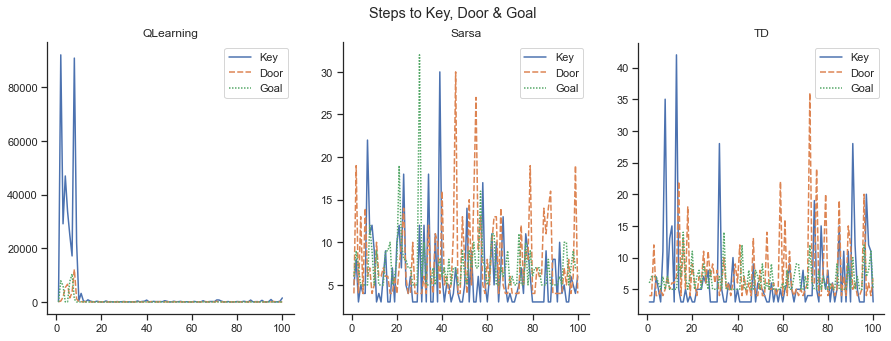

In [62]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('Steps to Key, Door & Goal')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("QLearning")
ax2.set_title("Sarsa")
ax3.set_title("TD")

sns.lineplot(data=qlkey, ax=ax1)
sns.lineplot(data=sarkey, ax=ax2)
sns.lineplot(data=tdkey, ax=ax3)

plt.show()



In [63]:
print(qlsteps)
print(qlsse)

print(qlsteps.describe())
print(qlsse.describe())

          Steps
Episodes       
1           201
2         15772
3          4983
4          1652
5            95
...         ...
96           16
97           21
98           12
99           11
100           9

[100 rows x 1 columns]
        SSE
1    348209
2    340709
3    335291
4    330754
5    324622
..      ...
96   193975
97   193833
98   193832
99   193832
100  193832

[100 rows x 1 columns]
              Steps
count    100.000000
mean     240.000000
std     1653.358804
min        8.000000
25%       10.000000
50%       12.000000
75%       16.250000
max    15772.000000
                 SSE
count     100.000000
mean   240100.410000
std     40000.356461
min    193832.000000
25%    205462.250000
50%    226106.000000
75%    263855.000000
max    348209.000000


In [69]:
print(qlwsteps)
print(qlwsse)

print(qlwsteps.describe())
print(qlwsse.describe())

          Steps
Episodes       
1           481
2         22645
3           137
4           220
5            96
...         ...
96           13
97            9
98           13
99           12
100          10

[100 rows x 1 columns]
        SSE
1    184554
2    179135
3    174598
4    170681
5    167257
..      ...
96    46958
97    46958
98    46852
99    46793
100   46793

[100 rows x 1 columns]
              Steps
count    100.000000
mean     249.340000
std     2262.822932
min        8.000000
25%       10.000000
50%       12.000000
75%       16.000000
max    22645.000000
                 SSE
count     100.000000
mean    86585.690000
std     35908.477985
min     46793.000000
25%     50160.750000
50%     83088.500000
75%    100290.500000
max    184554.000000


In [64]:
print(qlkey)
print(qlkeysteps)
print(qlkeysse)
# 50% is the median
print(qlkey.describe())
print(qlkeysteps.describe())
print(qlkeysse.describe())


       Key  Door  Goal
1      118    90    12
2    92002   311  7875
3    29099  1770  6060
4    46908  5406    42
5    33761  6588    27
..     ...   ...   ...
96      64   180     5
97      13    98     5
98      63     4     6
99     266     4     5
100   1495     5     6

[100 rows x 3 columns]
           Steps
Episodes        
1            220
2         100188
3          36929
4          52356
5          40376
...          ...
96           249
97           116
98            73
99           275
100         1506

[100 rows x 1 columns]
        SSE
1    192091
2    186672
3    178379
4    174526
5    171188
..      ...
96    53772
97    53324
98    52146
99    53726
100   57342

[100 rows x 1 columns]
                Key          Door          Goal
count    100.000000    100.000000    100.000000
mean    3766.580000    348.560000    339.990000
std    14529.190162   1512.096246   1606.644351
min        3.000000      4.000000      5.000000
25%       48.250000      5.000000      6.000000

In [79]:
print(sarsteps)
print(sarsse)

print(sarsteps.describe())
print(sarsse.describe())

          Steps
Episodes       
1            13
2             8
3            14
4             8
5            11
...         ...
96            9
97           27
98           17
99           15
100          14

[100 rows x 1 columns]
        SSE
1    348209
2    342791
3    337386
4    332726
5    324504
..      ...
96   102209
97    97568
98    96794
99    96698
100   96690

[100 rows x 1 columns]
            Steps
count  100.000000
mean    14.350000
std      7.855224
min      8.000000
25%     10.000000
50%     12.000000
75%     16.000000
max     60.000000
                SSE
count     100.00000
mean   186104.13000
std     68838.72504
min     96690.00000
25%    131021.00000
50%    179699.00000
75%    230071.00000
max    348209.00000


In [80]:
print(sarwsteps)
print(sarwsse)

print(sarwsteps.describe())
print(sarwsse.describe())

          Steps
Episodes       
1             8
2            10
3             8
4            10
5            10
...         ...
96            9
97           11
98           42
99            8
100          13

[100 rows x 1 columns]
        SSE
1    220070
2    214651
3    210114
4    206198
5    202538
..      ...
96    59121
97    59115
98    59110
99    59110
100   59108

[100 rows x 1 columns]
            Steps
count  100.000000
mean    14.250000
std      6.947676
min      8.000000
25%     10.000000
50%     12.000000
75%     17.000000
max     42.000000
                 SSE
count     100.000000
mean   103098.800000
std     46445.771588
min     59108.000000
25%     64236.750000
50%     85995.000000
75%    135729.750000
max    220070.000000


In [66]:
print(sarkey)
print(sarkeysteps)
print(sarkeysse)

# 50% is the median
print(sarkey.describe())
print(sarkeysteps.describe())
print(sarkeysse.describe())

     Key  Door  Goal
1      5     4     6
2      8    19     9
3      3     4     7
4      5    13     5
5      4     4     5
..   ...   ...   ...
96     3     8     5
97     6     4     7
98     5     6     9
99     4    19     7
100    6     4     7

[100 rows x 3 columns]
          Steps
Episodes       
1            15
2            36
3            14
4            23
5            13
...         ...
96           16
97           17
98           20
99           30
100          17

[100 rows x 1 columns]
        SSE
1    217662
2    212243
3    207706
4    203789
5    200366
..      ...
96    52810
97    52637
98    52623
99    52150
100   52236

[100 rows x 1 columns]
              Key        Door        Goal
count  100.000000  100.000000  100.000000
mean     6.240000    7.800000    7.230000
std      4.605925    5.075192    3.472417
min      3.000000    4.000000    5.000000
25%      3.000000    4.000000    5.000000
50%      5.000000    6.000000    7.000000
75%      8.000000   10.000000 

In [67]:
print(tdsteps)
print(tdsse)

print(tdsteps.describe())
print(tdsse.describe())

          Steps
Episodes       
1             8
2            10
3            27
4            10
5             8
...         ...
96           12
97           10
98           15
99           15
100          10

[100 rows x 1 columns]
        SSE
1    125218
2    119680
3    114684
4    110283
5    104088
..      ...
96    19541
97    18751
98    18120
99    17404
100   17577

[100 rows x 1 columns]
            Steps
count  100.000000
mean    14.340000
std      8.541308
min      8.000000
25%      9.000000
50%     11.000000
75%     16.250000
max     48.000000
                 SSE
count     100.000000
mean    39032.740000
std     26410.325904
min     16278.000000
25%     20396.750000
50%     27840.500000
75%     47045.250000
max    125218.000000


In [81]:
print(tdwsteps)
print(tdwsse)

print(tdwsteps.describe())
print(tdwsse.describe())

          Steps
Episodes       
1            19
2            11
3            12
4            12
5            21
...         ...
96           11
97           13
98           10
99           12
100          18

[100 rows x 1 columns]
       SSE
1    92691
2    87154
3    81640
4    77101
5    73184
..     ...
96   27317
97   26298
98   24239
99   22371
100  22185

[100 rows x 1 columns]
            Steps
count  100.000000
mean    14.630000
std      7.353492
min      8.000000
25%     10.000000
50%     12.000000
75%     16.250000
max     46.000000
                SSE
count    100.000000
mean   33043.010000
std    15083.947019
min    21090.000000
25%    23995.500000
50%    26403.000000
75%    36082.000000
max    92691.000000


In [68]:
print(tdkey)
print(tdkeysteps)
print(tdkeysse)

# 50% is the median
print(tdkey.describe())
print(tdkeysteps.describe())
print(tdkeysse.describe())


     Key  Door  Goal
1      3     4     6
2      3     4     7
3      3    12     7
4      7     4     7
5      5     4     6
..   ...   ...   ...
96     3    20    12
97    20     4     7
98    12     6     8
99    11     4    11
100    3     7     5

[100 rows x 3 columns]
          Steps
Episodes       
1            13
2            14
3            22
4            18
5            15
...         ...
96           35
97           31
98           26
99           26
100          15

[100 rows x 1 columns]
       SSE
1    86711
2    79809
3    75035
4    69803
5    66904
..     ...
96   27288
97   26167
98   27511
99   28608
100  27688

[100 rows x 1 columns]
              Key        Door        Goal
count  100.000000  100.000000  100.000000
mean     6.660000    7.520000    6.490000
std      6.629015    5.459641    2.129613
min      3.000000    4.000000    5.000000
25%      3.000000    4.000000    5.000000
50%      5.000000    6.000000    5.000000
75%      6.250000    8.000000    7.000000
